# Philippine Dengue Cases Exploratory and Inferential Analysis
This experiment aims to explore the Dengue cases in the Philippines per region from 2008 to 2016.

## Exploratory Data Analysis

### Import necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Import dataset

In [7]:
dengue_data = pd.read_csv('./denguecases.csv')

### Exploring the shape of the data

In [8]:
dengue_data.head()

,Month,Year,Region,Dengue_Cases
0,Jan,2008,Region.I,2.953926
1,Feb,2008,Region.I,2.183336
2,Mar,2008,Region.I,0.972410
3,Apr,2008,Region.I,9.357156
4,May,2008,Region.I,7.320599


### How many regions are in the data?
We cannot assume that all regions are in the data so we have to check.

In [9]:
dengue_data['Region'].unique()

array(['Region.I', 'Region.II', 'Region.III', 'Region.IV.A', 'Region.IV.B',
       'Region.V', 'Region.VI', 'Region.VII', 'Region.VIII', 'Region.IX',
       'Region.X', 'Region.XI', 'Region.XII', 'ARMM', 'CAR', 'CARAGA',
       'NCR'], dtype=object)

### What is the range of the data in years?
The data apparently ranges from 2008 to 2016.

In [10]:
dengue_data['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

### Visualizations

#### Multi-line chart by year

##### Aggregate by year and region

In [64]:
data_grouped_by_year_and_region = dengue_data.groupby(['Year', 'Region'])
data_per_year = data_grouped_by_year_and_region.sum().reset_index()
data_per_year.head()

,Year,Region,Dengue_Cases
0,2008,ARMM,14.510188
1,2008,CAR,104.050805
2,2008,CARAGA,133.421309
3,2008,NCR,119.276453
4,2008,Region.I,60.729777


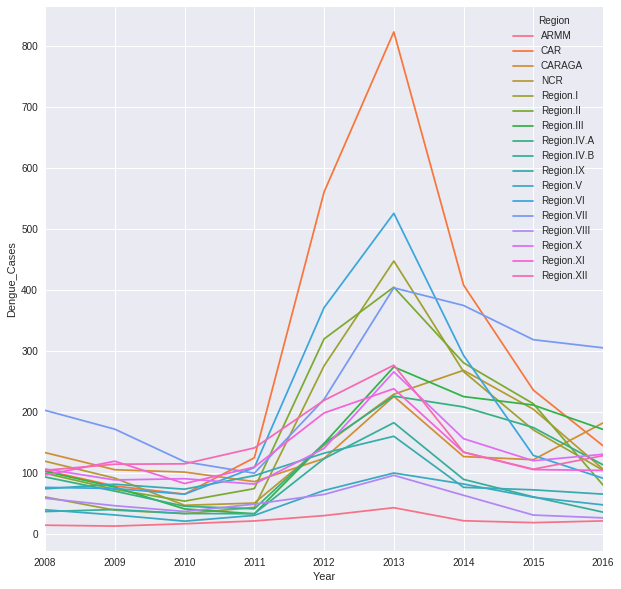

In [65]:
# Hack for making the the plot display
data_per_year['subject'] = 0

# Display the plot
f, ax = plt.subplots(figsize=(10, 10))
sns.tsplot(data=data_per_year, time='Year', condition='Region', unit='subject', value='Dengue_Cases', ax=ax)

#### Multiline chart by month

##### Month abbreviations used

In [46]:
months = dengue_data['Month'].unique()
months_dict = {month:i for i, month in enumerate(months)}

##### Aggregate by month and region

In [68]:
data_grouped_by_month_and_region = dengue_data.groupby(['Month', 'Region'])
data_per_month = data_grouped_by_month_and_region.median().reset_index()
data_per_month['Month'] = data_per_month['Month'].apply(lambda m: months_dict[m])
data_per_month.head()

,Month,Region,Year,Dengue_Cases
0,3,ARMM,2012,0.708386
1,3,CAR,2012,6.640401
2,3,CARAGA,2012,3.058576
3,3,NCR,2012,4.132564
4,3,Region.I,2012,5.792751


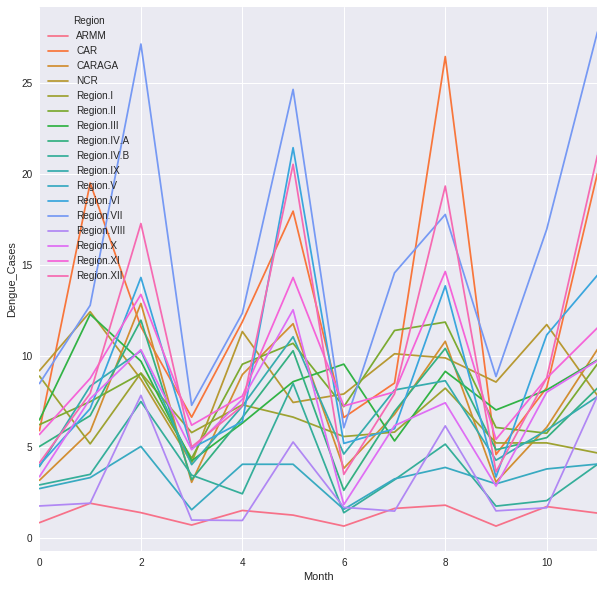

In [69]:
# Hack for making the the plot display
data_per_month['subject'] = 0

# Display the plot
f, ax = plt.subplots(figsize=(10, 10))
sns.tsplot(data=data_per_month, time='Month', condition='Region', unit='subject', value='Dengue_Cases', ax=ax)

What is up with this weird pattern? A spike every three (3) months??

#### Choropleths

##### Creating the regions for the map

In [13]:
regions = gpd.read_file('./Regions/Regions.shp')
regions.head()

,REGION,geometry
0,Autonomous Region of Muslim Mindanao (ARMM),(POLYGON ((119.4669418334962 4.586939811706523...
1,Bicol Region (Region V),(POLYGON ((122.9841690063476 11.71055984497071...
2,CALABARZON (Region IV-A),(POLYGON ((125.2216567993167 10.43443965911868...
3,Cagayan Valley (Region II),(POLYGON ((122.4703979492188 16.91995048522949...
4,Caraga (Region XIII),"(POLYGON ((126.417503356934 7.964169979095546,..."


##### Number of cases per region from 2008 - 2016
Here we'll create a map that will display the regions and their corresponding number of cases.

In [60]:
data_grouped_by_region = dengue_data.groupby(['Region'])
data_by_region = data_grouped_by_region.median().reset_index()
regions['DENGUE'] = data_by_region['Dengue_Cases']

In [59]:
regions.head()

,REGION,geometry,DENGUE
0,Autonomous Region of Muslim Mindanao (ARMM),(POLYGON ((119.4669418334962 4.586939811706523...,1.863503
1,Bicol Region (Region V),(POLYGON ((122.9841690063476 11.71055984497071...,23.553701
2,CALABARZON (Region IV-A),(POLYGON ((125.2216567993167 10.43443965911868...,11.169493
3,Cagayan Valley (Region II),(POLYGON ((122.4703979492188 16.91995048522949...,11.686109
4,Caraga (Region XIII),"(POLYGON ((126.417503356934 7.964169979095546,...",13.341650


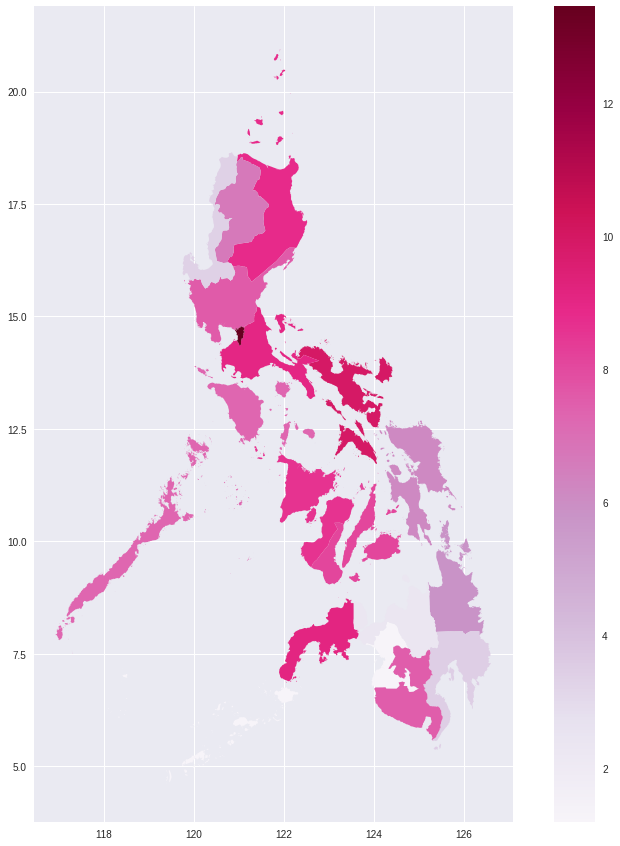

In [61]:
regions.plot(figsize=(15, 15), column='DENGUE', cmap='PuRd', legend=True)

##### Number of cases in each region per year

In [62]:
def year_to_map(year):
    region_copy = regions.copy()
    region_copy['DENGUE'] = data_per_year[data_per_year['Year'] == year][['Dengue_Cases']].reset_index()['Dengue_Cases']
    return region_copy

years = list(range(2008, 2017))
yearly_data = map(year_to_map, years)
yearly_data_list = list(yearly_data)

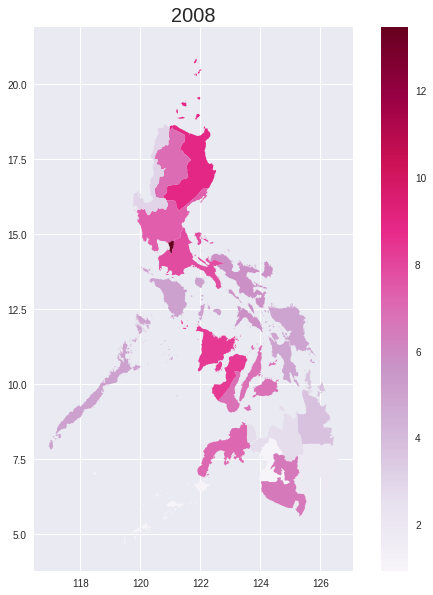

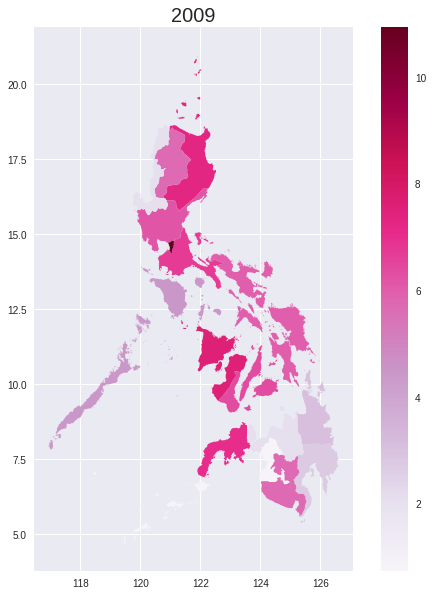

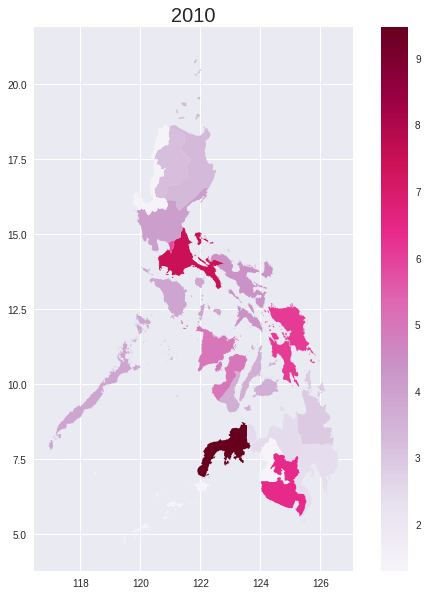

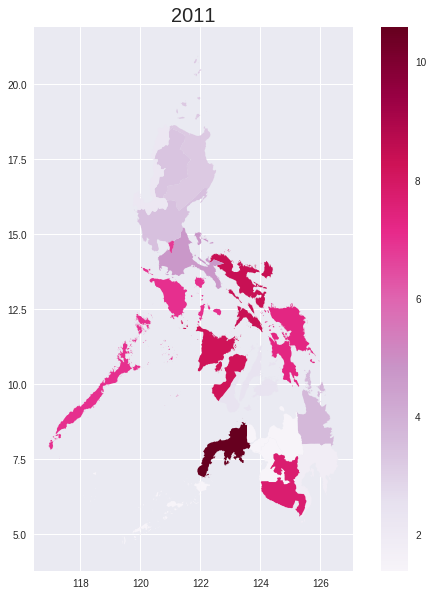

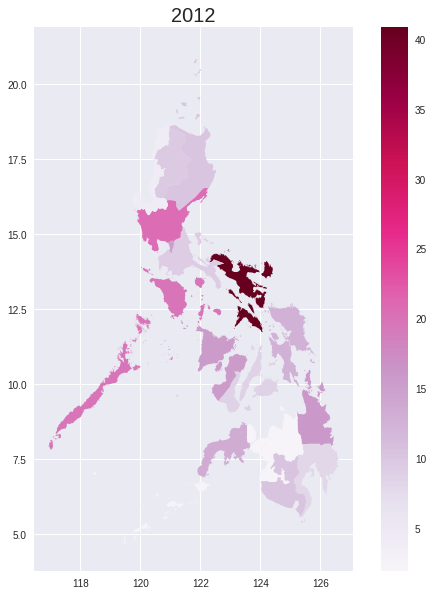

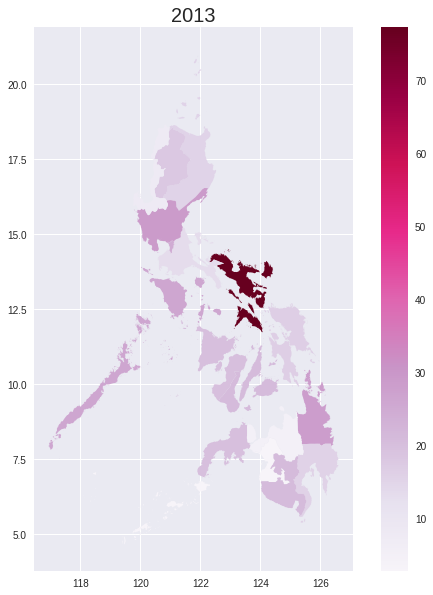

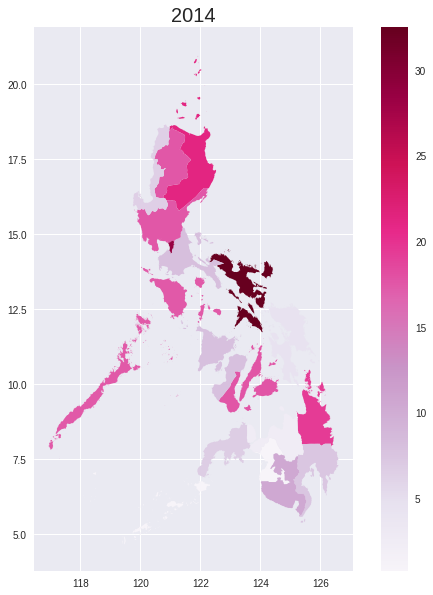

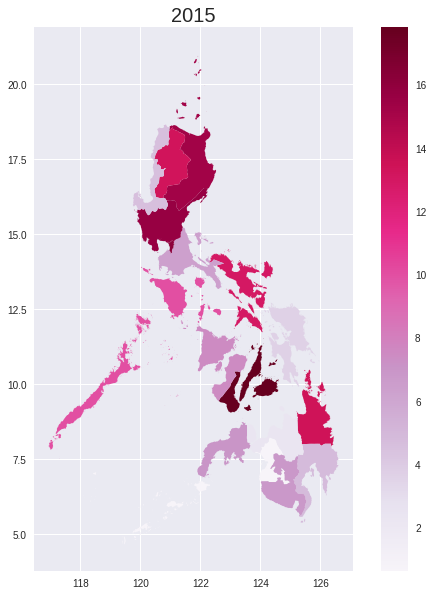

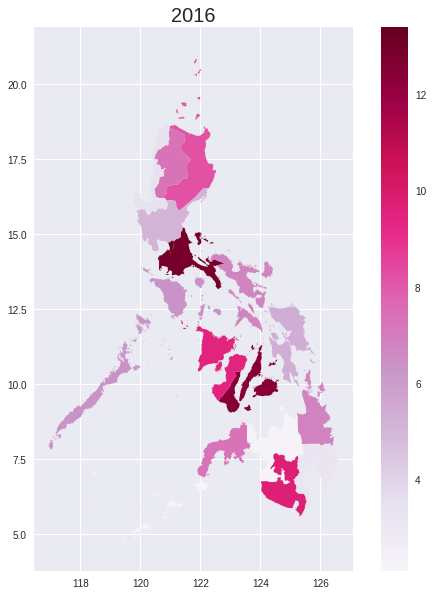

In [63]:
for index, region_copy in enumerate(yearly_data_list):
    region_copy.plot(figsize=(10, 10), column='DENGUE', cmap='PuRd', legend=True)
    plt.title(str(years[index]), size=20)
    plt.savefig(str(years[index]) + "-choro.png")

## Inferential Analysis

### Predicting next month's cases using previous month of all the regions